# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`

Por John Osorio C.C. 1035435726

* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import linear_model

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [3]:
#we divide the data into X (features) and y (Value to predict)
X_data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y_data = df[['CO2EMISSIONS']]
normalizing=False #we use this as a switch if we want to normalize
#visualizing some of the X data
X_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6


In [4]:
y_data.head()#visualizing y data

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

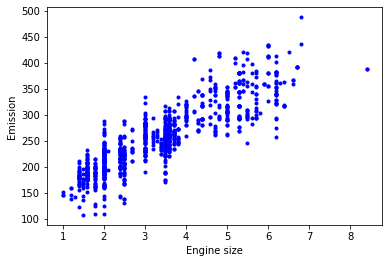

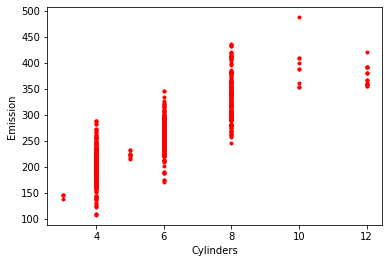

In [5]:
#we see how EMISSIOn is affected by ENGINE_SIZE and CYLINDERS, in both cases, we see a linear tendency
plt.scatter(X_data['ENGINESIZE'], y_data, marker='.', color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(X_data['CYLINDERS'], y_data,  marker='.', color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

<h2 id="reading_data">Visualize the data in 3D</h2>

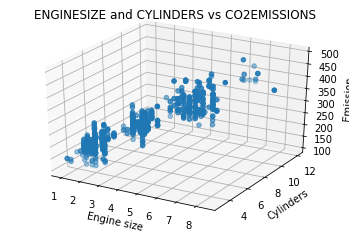

In [6]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection ='3d')
 
#3D data visualization, how is CO2EMISSIONS affected by both ENGINESIZE AND CYLINDERS, a linear tendency is observed as
#expected from previous plots
x = X_data['ENGINESIZE']
y = X_data['CYLINDERS']
z = y_data
ax.scatter(x, y, z) # must be floats
#ax.plot3D(x, y, z, 'green')

ax.set_xlabel('Engine size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('Emission') 
ax.set_title('ENGINESIZE and CYLINDERS vs CO2EMISSIONS')
plt.show()

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [7]:
from sklearn import preprocessing
#if we want to normalize the data, simply execute this cell.
normalizing = True
if normalizing:
    X_data = preprocessing.StandardScaler().fit(X_data).transform(X_data)
    print(X_data)

[[-0.9512918  -0.99896853 -0.82855772 -0.99334135 -0.88430407]
 [-0.66865251 -0.99896853 -0.5114328  -0.63532912 -0.5685715 ]
 [-1.30459092 -0.99896853 -1.77993246 -1.31555236 -1.63058106]
 ...
 [-0.24469358  0.11424235  0.02524013  0.11649658  0.06289365]
 [-0.10337393  0.11424235 -0.09673099 -0.06250954 -0.08062116]
 [-0.10337393  0.11424235  0.3911535   0.25970147  0.34992326]]


# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [8]:
#we divide the data into test and train
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (853, 5) (853, 1)
Test set: (214, 5) (214, 1)


<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [9]:
#we train the model
regr = linear_model.LinearRegression()
#when we normalize, the pandas column format is lost and we are left with an array
if(normalizing==False):
    #if we don't normalize, then we need to convert the pandas df to numpy
    X_train = X_train.to_numpy()
#y_train is not normalized, so it is not affected
y_train = y_train.to_numpy()
#we made the predictions of the linear coefficients
regr.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[15.26888157 13.40410829  8.17287197  4.1717072  20.92657217]]
Intercept:  [256.25237608]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [10]:
#the data has a good prediction, 85%
if(normalizing==False):#same as before,we need to convert to array if we are not normalizing
    X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

R2=regr.score(X_test, y_test) # R-Squared (how good is the fit)
print('R2=',R2)


R2= 0.8713647188386315


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [11]:
#we choose 10 values at random and see that except for the first value, the predictions are close.
preds = regr.predict(X_test[0:10,:])
for i in range(len(preds)):
    print(preds[i],y_test[i])

[181.72631432] [181]
[304.33723897] [292]
[198.91514987] [196]
[314.14007199] [310]
[285.61471517] [281]
[310.90840671] [336]
[265.32811512] [278]
[253.13626122] [248]
[256.8837533] [258]
[237.41946328] [239]


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [12]:
#calculating the errors and R2 we notice that the model is a good one
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)
preds = regr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(preds- y_test)))
print("Mean Absolute Percentage Error (MAPE): %.2f" % (100*np.mean(np.absolute((preds - y_test)/y_test))))
print("R2-score: %.2f" % regr.score(X_test, y_test))

Mean absolute error: 15.76
Mean Absolute Percentage Error (MAPE): 6.25
R2-score: 0.87


Let's calculate the same metrics for a single linear regression model using Engine Size

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

#we choose the first column, ENGINE_SIZE
X_train_aux = X_train[:,0].reshape(-1, 1)
regr.fit(X_train_aux, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[55.5927417]]
Intercept:  [256.72234331]


In [14]:
X_test_aux = np.asanyarray(X_test[:,0].reshape(-1, 1))
preds = regr.predict(X_test_aux)

print("Mean absolute error: %.2f" % np.mean(np.absolute(preds- y_test)))
print("Mean Absolute Percentage Error (MAPE): %.2f" % (100*np.mean(np.absolute((preds - y_test)/y_test))))
print("R2-score: %.2f" % regr.score(X_test_aux, y_test))

Mean absolute error: 22.11
Mean Absolute Percentage Error (MAPE): 8.95
R2-score: 0.77


We note that using a multi-linear regression model there are better predictions of the test data, due to lower errors and bigger R2 score.